## REgresión Logística con scikit-learn Introducción (Parte 1)
Vamos a estudiar un problema simple de clasificación.  
Suponer que le preguntamos a 20 estudiantes que están realizando un examen, cuanto tiempo gastaron en prepararse para el examen y se obtuvieron los siguientes  resultados en horas:

In [1]:
# importaciones necesarias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-v0_8-whitegrid")

In [5]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 3.75, 
                  4., 4.25, 4.5, 4.75, 5., 5.5])

In [6]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

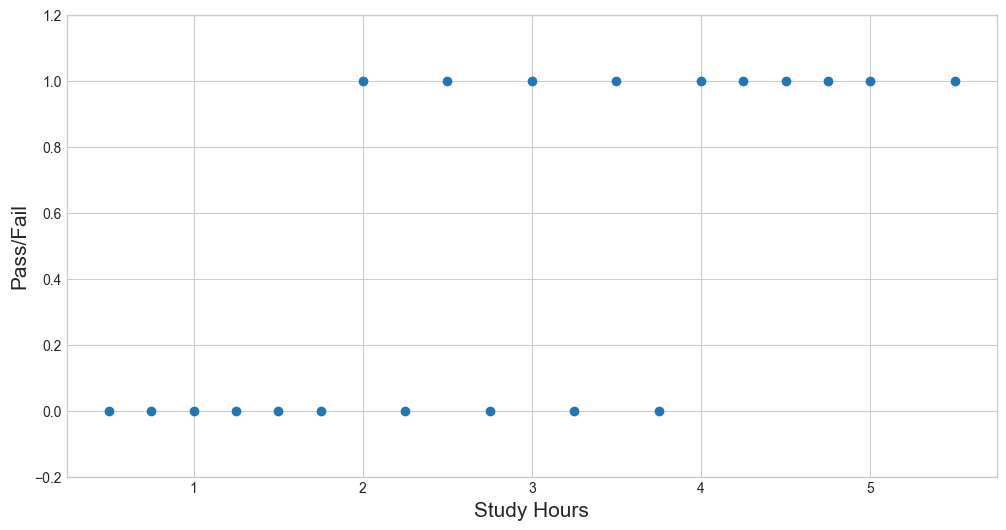

In [7]:
plt.figure(figsize=(12, 6))
plt.scatter(hours, success)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.ylim(-0.2, 1.2)
plt.show()